In [1]:
# based on <https://github.com/leelabcnbc/thesis-yimeng-v1/blob/master/results_ipynb/yuanyuan_8k_a_3day/transfer_learning_factorized_vgg.ipynb>

In [2]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training_extra.transfer_learning.meta import fetch_meta
from thesis_v2.training_extra.transfer_learning.analysis import collect_one_setting

In [4]:
folder_to_check = 'scripts/training/crcns_pvc8_large/transfer_learning_factorized_vgg'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit import param_iterator, sparse_list, feature_file_name
from key_utils import keygen

num_sparse = len(sparse_list)

In [5]:
def load_everything():
    _df_collect = []
    argmax_all = []
    for idx, param in enumerate(param_iterator(include_sparse=False)):
        if idx % 5 == 0:
            print(idx)
        assert param['split_seed'] == 0 and param['model_seed'] == 0
        
        # get meta
        with h5py.File(feature_file_name, 'r') as f_feature:
            meta_this = fetch_meta(f_feature['large/' + param['suffix']], 'large/' + param['suffix'])
        assert meta_this['dataset'] == 'large'
        assert meta_this['layer_unroll'] == 0
        
        performance_result = collect_one_setting(
            sparse_list = sparse_list,
            keygen=keygen,
            param=param,
            num_neuron=221,
        )
       
        _df_collect.append({
            'network': meta_this['network'],
            'shuffle_type': param['shuffle_type'],
            'scale,loss,act': f"{meta_this['setting']},{param['loss_type']},{param['act_fn']}",
            'layer': '{:02d}.{}'.format(meta_this['layer_idx'], meta_this['layer_name']),
            'corr_test': performance_result['test_best'].mean(),
        })
        
        # which sparsity setting is used.
        argmax_all.append(performance_result['argmax'])
        
    argmax_all = np.concatenate(argmax_all, axis=0)
    # looks good. most neurons select middle ones.
    
    # remove -1 ones.
    argmax_all = argmax_all[argmax_all!=-1]
    print(np.bincount(argmax_all)/argmax_all.size)

    _df =  pd.DataFrame(_df_collect, columns=['shuffle_type', 'network', 'scale,loss,act', 'layer', 'corr_test'])
    _df = _df.set_index(['shuffle_type', 'network', 'scale,loss,act', 'layer'], verify_integrity=True)
    return _df

In [6]:
df = load_everything()

['vgg11/half/1.0', 'vgg11/half/2.0', 'vgg11/half/3.0', 'vgg11/half/4.0', 'vgg11/half/5.0', 'vgg11/half/6.0', 'vgg11_bn/half/1.0', 'vgg11_bn/half/2.0', 'vgg11_bn/half/3.0', 'vgg11_bn/half/4.0', 'vgg11_bn/half/5.0', 'vgg11_bn/half/6.0', 'vgg16/half/2.0', 'vgg16/half/3.0', 'vgg16/half/4.0', 'vgg16/half/5.0', 'vgg16/half/6.0', 'vgg16/half/7.0', 'vgg16/half/8.0', 'vgg16/half/9.0', 'vgg16_bn/half/2.0', 'vgg16_bn/half/3.0', 'vgg16_bn/half/4.0', 'vgg16_bn/half/5.0', 'vgg16_bn/half/6.0', 'vgg16_bn/half/7.0', 'vgg16_bn/half/8.0', 'vgg16_bn/half/9.0']
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
[0.05490465 0.48517292 0.27925016 0.0779331  0.10273917]


In [7]:
df
# results match old file.

corr_test
shuffle_type network  scale,loss,act        layer                
paired       vgg11    half,poisson,softplus 01.pool1     0.520946
                      half,mse,softplus     01.pool1     0.518027
                      half,poisson,relu     01.pool1     0.546580
                      half,mse,relu         01.pool1     0.532640
                      half,poisson,softplus 02.conv2_1   0.606338
                      half,mse,softplus     02.conv2_1   0.603638
                      half,poisson,relu     02.conv2_1   0.617588
                      half,mse,relu         02.conv2_1   0.603891
                      half,poisson,softplus 03.pool2     0.619373
                      half,mse,softplus     03.pool2     0.615352
                      half,poisson,relu     03.pool2     0.637808
                      half,mse,relu         03.pool2     0.627129
                      half,poisson,softplus 04.conv3_1   0.603426
                      half,mse,softplus     04.conv3_1   0.598640
                      half,poisson,relu     04.conv3_1   0.607238
                      half,mse,relu         04.conv3_1   0.604055
                      half,poisson,softplus 05.conv3_2   0.481872
                      half,mse,softplus     05.conv3_2   0.472661
                      half,poisson,relu     05.conv3_2   0.477919
                      half,mse,relu         05.conv3_2   0.483338
                      half,poisson,softplus 06.pool3     0.590495
                      half,mse,softplus     06.pool3     0.590722
                      half,poisson,relu     06.pool3     0.607711
                      half,mse,relu         06.pool3     0.599009
             vgg11_bn half,poisson,softplus 01.pool1     0.523034
                      half,mse,softplus     01.pool1     0.523077
                      half,poisson,relu     01.pool1     0.544269
                      half,mse,relu         01.pool1     0.536905
                      half,poisson,softplus 02.conv2_1   0.626565
                      half,mse,softplus     02.conv2_1   0.616368
                      half,poisson,relu     02.conv2_1   0.622464
                      half,mse,relu         02.conv2_1   0.623254
                      half,poisson,softplus 03.pool2     0.630049
                      half,mse,softplus     03.pool2     0.624324
                      half,poisson,relu     03.pool2     0.636319
                      half,mse,relu         03.pool2     0.634465
                      half,poisson,softplus 04.conv3_1   0.621757
                      half,mse,softplus     04.conv3_1   0.612959
                      half,poisson,relu     04.conv3_1   0.622690
                      half,mse,relu         04.conv3_1   0.619878
                      half,poisson,softplus 05.conv3_2   0.470746
                      half,mse,softplus     05.conv3_2   0.461654
                      half,poisson,relu     05.conv3_2   0.469969
                      half,mse,relu         05.conv3_2   0.466184
                      half,poisson,softplus 06.pool3     0.605239
                      half,mse,softplus     06.pool3     0.605076
                      half,poisson,relu     06.pool3     0.610753
                      half,mse,relu         06.pool3     0.607864
             vgg16    half,poisson,softplus 02.pool1     0.534366
                      half,mse,softplus     02.pool1     0.523706
                      half,poisson,relu     02.pool1     0.552075
                      half,mse,relu         02.pool1     0.544259
                      half,poisson,softplus 03.conv2_1   0.542346
                      half,mse,softplus     03.conv2_1   0.529501
                      half,poisson,relu     03.conv2_1   0.556794
                      half,mse,relu         03.conv2_1   0.549985
                      half,poisson,softplus 04.conv2_2   0.539336
                      half,mse,softplus     04.conv2_2   0.535003
                      half,poisson,relu     04.conv2_2   0.540761
                      half,mse

In [8]:
# for loop visualize every thing.

def visualize(shuffle_type):
    df_corr_only = df['corr_test'].xs(shuffle_type, level='shuffle_type')
    for net in df_corr_only.index.get_level_values('network').unique():
        print(net)
        plt.close('all')
        df_this = df_corr_only.xs(net, level='network')
        df_this.unstack('scale,loss,act').sort_index().plot(rot=45)
        plt.show()

In [9]:
# visualize('legacy')
# roughly matching old results

vgg11


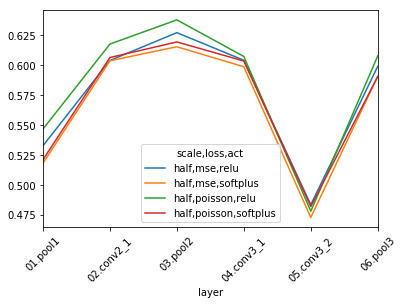

vgg11_bn


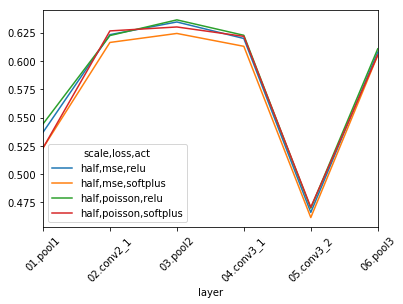

vgg16


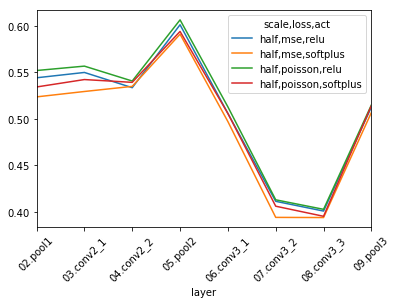

vgg16_bn


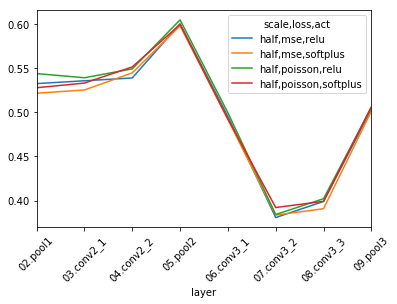

In [10]:
visualize('paired')
# roughly matching old results